In [6]:
from gala.units import galactic

import galarp as grp

import numpy as np

import astropy.units as u


from matplotlib import pyplot as plt

In [2]:
sim = grp.RPSim(particles=grp.builtins.particles.LowResUniformGrid(),
                wind=grp.winds.ConstantWind(strength=50 * u.km / u.s))
orbits = sim.run(integration_time=1000, shadow_on=False, wind_on=True)      
grp.plotting.k3d_plot([orbits])

/home/hsouch/gala/gala/potential/potential/core.py:373: RuntimeWarning: invalid value encountered in divide
  epsilon = h * q / r[:, np.newaxis]
        Use Integrator call method instead. [galarp.core.sim]
/home/hsouch/anaconda3/lib/python3.11/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

(200, 2819)


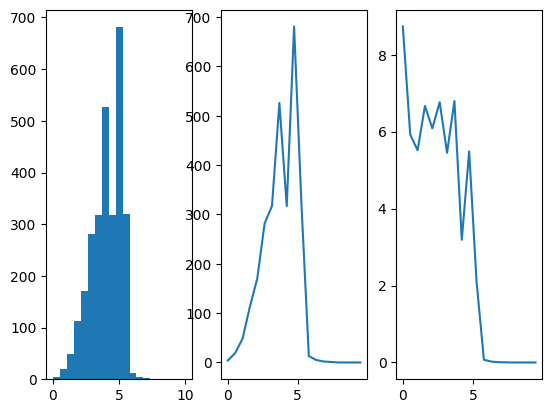

In [3]:
xs, ys, zs, vx, vy, vz = orbits.get_orbit_data(transposed=False)

print(xs.shape)

ind = 199
xs, ys, zs = xs[ind], ys[ind], zs[ind]

rs = np.sqrt(xs**2 + ys**2 + zs**2)

r_bins = np.linspace(0, 10, 20)
density = np.histogram(rs, bins=r_bins)[0]

shell_area = np.pi * (r_bins[1:]**3 - r_bins[:-1]**3)


fig, ax = plt.subplots(1, 3)

ax[0].hist(rs, bins=r_bins)

ax[1].plot(r_bins[:-1], density)

ax[2].plot(r_bins[:-1], density / shell_area)

In [7]:
class Pressure:

    def __init__(self, units=galactic):
        self.pressure = 0

        self.r_bins = np.linspace(0, 10, 20)
        self.shell_area = np.pi * (r_bins[1:]**3 - r_bins[:-1]**3)

    def evaluate(self, q):
        rs = np.sqrt(q[0]**2 + q[1]**2 + q[2]**2)
        density = np.histogram(rs, bins=self.r_bins)[0]

        

p = Pressure()
p.evaluate(np.stack([xs, ys, zs]))

In [ ]:
print()

51.4 µs ± 785 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
